In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Énoncé
Consultant pour Olist, nous devons fournir aux équipes d'e-commerce une segmentation des clients utilisable au quotidien pour leurs campagnes de communication.
## Mission
Nous allons réaliser dans un premier temps un nettoyage et une courte analyse exploratoire des données.

### Analyse des différents jeux de données

Définissons une fonction qui nous renseigne sur le jeu de données:

In [10]:
def info_df(name):
    """Read the csv file and return the dataframe and also print the number of rows and columns,
    the features of the dataframe.
    Parameters
    ----------
    name : string
           The csv file name
    Returns
    -------
    df : dataframe
    """
    df=pd.read_csv(name)
    print(("The dataset {} have {} rows and {} columns").format(name,df.shape[0],df.shape[1]))
    print(("The features of the dataset are :\n{}").format(df.columns))
    print("An overview of the dataset:")
    return df

#### Customers_dataset

In [11]:
df_customers = info_df('olist_customers_dataset.csv')
df_customers.head()

The dataset olist_customers_dataset.csv have 99441 rows and 5 columns
The features of the dataset are :
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
An overview of the dataset:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Geolocation_dataset

Lecture du second jeu de données:

In [12]:
df_geo = info_df('olist_geolocation_dataset.csv')
df_geo.head()

The dataset olist_geolocation_dataset.csv have 1000163 rows and 5 columns
The features of the dataset are :
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
An overview of the dataset:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Order_items_dataset

In [13]:
df_items = info_df('olist_order_items_dataset.csv')
df_items.head()

The dataset olist_order_items_dataset.csv have 112650 rows and 7 columns
The features of the dataset are :
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
An overview of the dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Order_payments_dataset

In [14]:
df_payments = info_df('olist_order_payments_dataset.csv')
df_payments.head()

The dataset olist_order_payments_dataset.csv have 103886 rows and 5 columns
The features of the dataset are :
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
An overview of the dataset:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Order_reviews_dataset

In [15]:
df_reviews = info_df('olist_order_reviews_dataset.csv')
df_reviews.head()

The dataset olist_order_reviews_dataset.csv have 99224 rows and 7 columns
The features of the dataset are :
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
An overview of the dataset:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Orders_dataset

In [16]:
df_orders_ = info_df('olist_orders_dataset.csv')
df_orders_.head()

The dataset olist_orders_dataset.csv have 99441 rows and 8 columns
The features of the dataset are :
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
An overview of the dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Products_dataset

In [17]:
df_products = info_df('olist_products_dataset.csv')
df_products.head()

The dataset olist_products_dataset.csv have 32951 rows and 9 columns
The features of the dataset are :
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
An overview of the dataset:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Sellers_dataset

In [18]:
df_sellers = info_df('olist_sellers_dataset.csv')
df_sellers.head()

The dataset olist_sellers_dataset.csv have 3095 rows and 4 columns
The features of the dataset are :
Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')
An overview of the dataset:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Product_category_name_translation

In [19]:
df_transation = info_df('product_category_name_translation.csv')
df_transation.head()

The dataset product_category_name_translation.csv have 71 rows and 2 columns
The features of the dataset are :
Index(['product_category_name', 'product_category_name_english'], dtype='object')
An overview of the dataset:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Geolocation_dataset

Analysons les prefixes des zip code:

In [20]:
df_geo.groupby('geolocation_zip_code_prefix').count()

,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
geolocation_zip_code_prefix,,,,
1001,26,26,26,26
1002,13,13,13,13
1003,17,17,17,17
1004,22,22,22,22
1005,25,25,25,25
...,...,...,...,...
99960,5,5,5,5
99965,6,6,6,6
99970,21,21,21,21


Nous décidons de considérer la moyenne des géolocalisations pour chacun des codes postaux:

In [21]:
df_geo_mean = df_geo.groupby('geolocation_zip_code_prefix').mean()
df_geo_mean

,geolocation_lat,geolocation_lng
geolocation_zip_code_prefix,,
1001,-23.550190,-46.634024
1002,-23.548146,-46.634979
1003,-23.548994,-46.635731
1004,-23.549799,-46.634757
1005,-23.549456,-46.636733
...,...,...
99960,-27.953722,-52.025511
99965,-28.183372,-52.039850
99970,-28.343766,-51.874689


#### Géolocalisation des acheteurs

Définissons le dataframe des géolocalisations des acheteurs:

In [22]:
df_geo_customer = pd.DataFrame({"customer_zip_code_prefix":df_geo_mean.index,
                                "geolocation_lat_customer":df_geo_mean["geolocation_lat"].values,
                                "geolocation_lng_customer":df_geo_mean["geolocation_lng"].values})

Faisons la jointure des deux jeux de données:

In [23]:
df_customers = df_customers.merge(df_geo_customer, how='left', on='customer_zip_code_prefix')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925


####  Géolocalisation des vendeurs

Définissons le dataframe des géolocalisations des vendeurs:

In [24]:
df_geo_sellers = pd.DataFrame({"seller_zip_code_prefix":df_geo_mean.index,
                              "geolocation_lat_seller":df_geo_mean["geolocation_lat"].values,
                              "geolocation_lng_seller":df_geo_mean["geolocation_lng"].values})

Faisons la jointure des deux jeux de données:

In [25]:
df_sellers = df_sellers.merge(df_geo_sellers, how='left', on='seller_zip_code_prefix')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_seller,geolocation_lng_seller
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.964803,-46.534419


#### Noms des produits

Nous allons joindre les deux jeux de données afin d'avoir le nom des produits en anglais:

In [26]:
df_products = df_products.merge(df_transation, how='left', on='product_category_name')

Nous éliminons le noms de produits en portugais:

In [27]:
df_products.drop('product_category_name', axis=1, inplace=True)
df_products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


### Préparation  du jeu de donnée des commandes

Nous allons créer le fichier des commandes en regroupant les différents jeux de données:

In [28]:
df_orders = df_orders_.merge(df_customers, how='outer', on='customer_id')
df_orders = df_orders.merge(df_reviews, how='outer', on='order_id')
df_orders = df_orders.merge(df_payments, how='outer', on='order_id')
df_orders = df_orders.merge(df_items, how='outer', on='order_id')
df_orders = df_orders.merge(df_products, how='outer', on='product_id')
df_orders = df_orders.merge(df_sellers, how='outer', on='seller_id')

Vérifions les doublons sur l'identifiant unique des commandes des clients:

In [29]:
df_orders.duplicated('customer_id').sum()

19702

Eliminons les doublons:

In [30]:
df_orders = df_orders.drop_duplicates(subset={'customer_id'}, keep='first')
df_orders = df_orders.reindex()

Listons les features:

In [31]:
df_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_lat_customer',
       'geolocation_lng_customer', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_la

Un aperçu :

In [32]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_seller,geolocation_lng_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,-23.680729,-46.444238
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,-23.680729,-46.444238
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,-23.680729,-46.444238
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,-23.680729,-46.444238
6,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,...,238.0,20.0,10.0,15.0,baby,9350.0,maua,SP,-23.680729,-46.444238


Analysons le jeu de données:

In [33]:
df_orders.describe()

,customer_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller
count,99441.000000,99163.000000,99163.000000,98673.000000,99440.000000,99440.000000,99440.000000,98666.000000,98666.000000,98666.000000,97253.000000,97253.000000,97253.000000,98650.000000,98650.000000,98650.000000,98650.000000,98666.000000,98450.000000,98450.000000
mean,35137.474583,-21.191224,-46.175442,4.086853,1.022878,2.915617,158.334781,1.016449,125.945710,20.181896,48.855912,794.048934,2.250316,2104.060274,30.107106,16.482433,23.023528,24607.951189,-22.794132,-47.221691
std,29797.938996,5.608637,4.056067,1.347287,0.250282,2.709861,219.518488,0.145693,191.337419,15.899848,9.993163,654.677745,1.746295,3766.119528,16.137012,13.324701,11.740267,27688.089902,2.747566,2.346849
min,1003.000000,-33.689948,-72.668881,1.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,-32.079231,-67.813284
25%,11347.000000,-23.589378,-48.097950,4.000000,1.000000,1.000000,60.050000,1.000000,41.737500,13.270000,42.000000,349.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,-23.612734,-48.796518
50%,24416.000000,-22.924970,-46.630647,5.000000,1.000000,2.000000,103.350000,1.000000,79.000000,16.350000,52.000000,607.000000,2.000000,700.000000,25.000000,13.000000,20.000000,13563.500000,-23.425556,-46.744092
75%,58900.000000,-20.139828,-43.598897,5.000000,1.000000,4.000000,175.130000,1.000000,139.900000,21.220000,57.000000,996.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,29156.000000,-21.757321,-46.518679
max,99990.000000,42.184003,-8.723762,5.000000,27.000000,24.000000,13664.080000,7.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,-2.501242,-34.855616


### Traitement des valeurs manquantes

Affichons les valeurs manquantes:

In [34]:
df_nan = df_orders.isna().sum().sort_values(ascending=False)
df_nan

review_comment_title             87890
review_comment_message           58656
order_delivered_customer_date     2965
product_category_name_english     2210
product_description_lenght        2188
product_name_lenght               2188
product_photos_qty                2188
order_delivered_carrier_date      1783
geolocation_lng_seller             991
geolocation_lat_seller             991
product_length_cm                  791
product_width_cm                   791
product_height_cm                  791
product_weight_g                   791
order_item_id                      775
product_id                         775
seller_id                          775
shipping_limit_date                775
price                              775
freight_value                      775
seller_zip_code_prefix             775
seller_city                        775
seller_state                       775
review_answer_timestamp            768
review_creation_date               768
review_id                

Il en découle le graphe suivant:

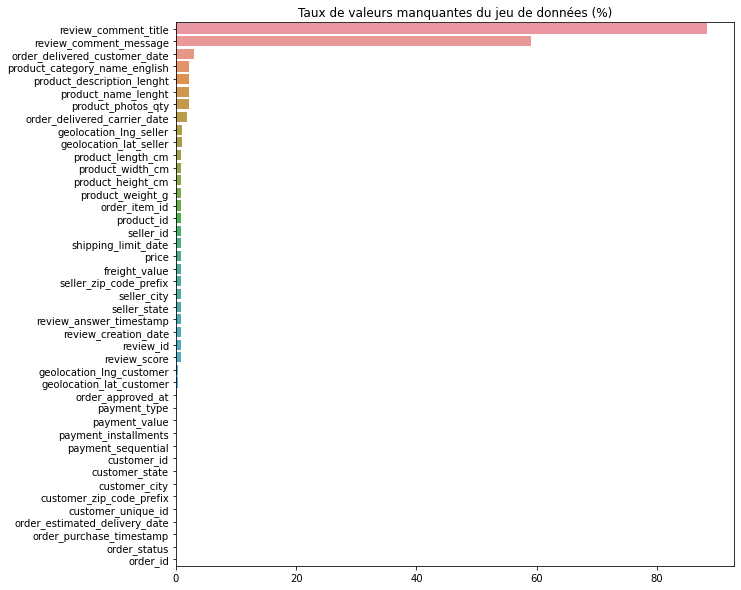

In [35]:
plt.figure(figsize = (10,10))
plt.title('Taux de valeurs manquantes du jeu de données (%)')
fig = sns.barplot(x=df_nan.values/df_orders.shape[0]*100, y=df_nan.index)

#### Imputation des NaN des features de reviews

Définissons une fonction qui affiche les features ayant un taux de NaN supérieur à un seuil:

In [46]:
def null_factor(df, tx):
    """Displays features with a percentage of missing values greater than a threshold.
    Parameters
    ----------
    df : dataframe
    tx:  integer
         the threshold 
    Returns
    -------
    full_null_rate : list of features with a percentage of missing values greater than tx
    """
    null_rate = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False).reset_index()
    null_rate.columns = ['Variable','Taux_de_Null']
    high_null_rate = null_rate[null_rate.Taux_de_Null >= tx]
    return high_null_rate

Affichons les features ayant les plus haut valeurs manquantes:

In [47]:
full_null_rate = null_factor(df_orders, 60)
full_null_rate

,Variable,Taux_de_Null
0,review_comment_title,88.384067


Nous décidons d'éliminer la feature ayant un taux de valeurs nulles supérieur à 80%:

In [48]:
df_orders.drop(['review_comment_title'], axis=1, inplace=True)

#### Imputation des NaN des dates

Nous décidons d'imputer des valeurs manquantes des dates par des valeurs de date connues:

In [49]:
df_orders["order_approved_at"] = df_orders["order_approved_at"].fillna(df_orders["order_purchase_timestamp"])
df_orders["order_delivered_carrier_date"] = df_orders["order_delivered_carrier_date"].\
                                            fillna(df_orders["order_approved_at"])
df_orders["order_delivered_customer_date"] = df_orders["order_delivered_customer_date"].\
                                             fillna(df_orders["order_estimated_delivery_date"])
df_orders["review_creation_date"] = df_orders["review_creation_date"].fillna(df_orders["order_delivered_customer_date"])
df_orders["review_answer_timestamp"] = df_orders["review_answer_timestamp"].fillna(df_orders["review_creation_date"])
df_orders["shipping_limit_date"] = df_orders["shipping_limit_date"].fillna(df_orders["order_approved_at"])

#### imputation par unknown 

Nous décidons d'imputer les valeurs manquantes des features par 'unknown':

Listons ces features:

In [52]:
liste_nan_unknown = [
    'product_category_name_english',
    'review_id','product_id','seller_id',
    'review_comment_message',
]
liste_nan_unknown

['product_category_name_english',
 'review_id',
 'product_id',
 'seller_id',
 'review_comment_message']

Imputons les valeurs manquantes de ces features:

In [55]:
df_orders[liste_nan_unknown] = df_orders[liste_nan_unknown].fillna('unknown')

#### Imputations par la valeur la plus fréquente

Nous décidons d'imputer les valeurs manquantes des features par la valeur la plus fréquente:

Listons ces features:

In [56]:
liste_nan_mode = [
    'payment_type','order_item_id',
    'seller_zip_code_prefix',
    'seller_city','seller_state',
]
liste_nan_mode

['payment_type',
 'order_item_id',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state']

Définissons une fonction pour imputer les nan par la mode:

In [58]:
def nan_to_mode(df, liste):
    """Fill the NaN values with the mode.
    Parameters
    ----------
    df : dataframe
    liste:  list
            list of the features
    Returns
    -------
    df : dataframe
    """
    for col in liste:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

Imputons les valeurs manquantes:

In [59]:
df_orders = nan_to_mode(df_orders, liste_nan_mode)

#### Imputation par ma médiane

Nous décidons d'imputer les valeurs manquantes des feaures par leur médiane:

Definissons une fonction qui impute les NaN en ma mediane:

In [62]:
def nan_to_median(df, liste):
    """Fill the NaN values with the median.
    Parameters
    ----------
    df : dataframe
    liste:  list
            list of the features
    Returns
    -------
    df : dataframe
    """
    for col in liste:
        df[col] = df[col].fillna(df[col].median())
    return df

Listons ces features:

In [63]:
liste_nan_to_median = [
    'product_name_lenght','product_description_lenght','product_photos_qty',
    'product_length_cm','product_height_cm','product_width_cm','product_weight_g',
    'payment_value','payment_installments','payment_sequential','review_score','price',
    'freight_value',
]
liste_nan_to_median

['product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_weight_g',
 'payment_value',
 'payment_installments',
 'payment_sequential',
 'review_score',
 'price',
 'freight_value']

Imputons les NaN:

In [64]:
df_orders = nan_to_median(df_orders, liste_nan_to_median)

#### Imputation par IterativeImputer

Nous décidons d'imputer les valeurs manquantes des features par iterative imputer:

Définissons la fonction pour ce mode d'imputation:

In [65]:
def iterative_imputer(df,liste):
    """Fill the NaN values using the iterative imputer.
    Parameters
    ----------
    df : dataframe
    liste:  list
            list of the features
    Returns
    -------
    df : dataframe
    """
    for i in liste:
        X = df[[i]].values
        imputer = IterativeImputer()
        imputer.fit(X)
        X = imputer.transform(X)
        df[i] = X

Listons cles features:

In [66]:
liste_nan=[
    'geolocation_lng_customer','geolocation_lat_customer',
    'geolocation_lng_seller','geolocation_lat_seller',
]
liste_nan

['geolocation_lng_customer',
 'geolocation_lat_customer',
 'geolocation_lng_seller',
 'geolocation_lat_seller']

Imputons les NaN:

In [67]:
iterative_imputer(df_orders,liste_nan)

Recontrollons les valeurs manquantes:

In [68]:
df_orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
geolocation_lat_customer         0
geolocation_lng_customer         0
review_id                        0
review_score                     0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value       

Sa taille:

In [69]:
print(("Le jeu de données des commandes compte {} lignes et {} colonnes").format(df_orders.shape[0],df_orders.shape[1]))

Le jeu de données des commandes compte 99441 lignes et 42 colonnes


### Exploration du jeu de données

Affichons la distribution du nombre de commandes par client

Il en découle le diagramme camembert suivant:

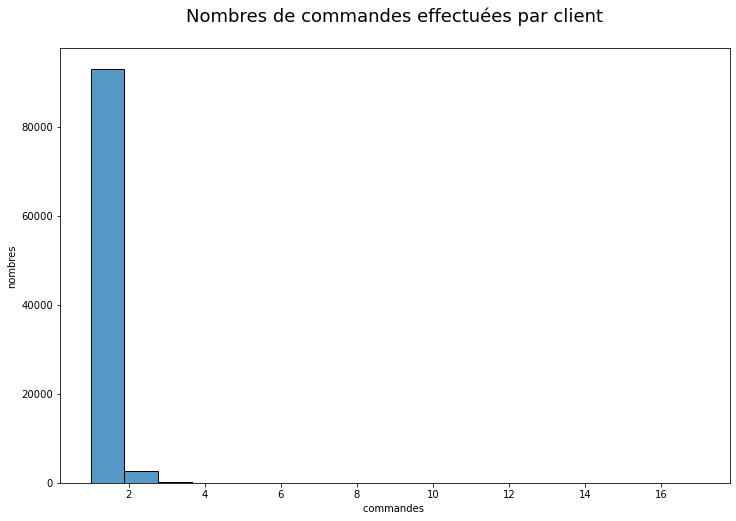

In [70]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df_orders.groupby("customer_unique_id").agg({"customer_id": "count"}), x='customer_id' )
ax.set_xlabel("commandes ")
ax.set_ylabel("nombres")
title = plt.title(f"Nombres de commandes effectuées par client\n", fontsize=18)

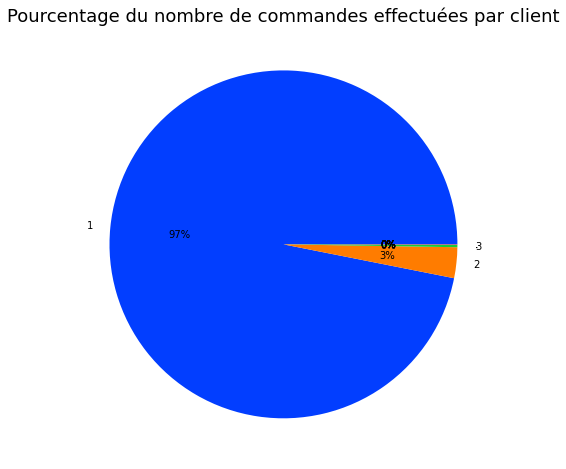

In [71]:
comptage_orders = df_orders.groupby("customer_unique_id").agg({"customer_id": "count"}).value_counts()
colors = sns.color_palette('bright')
plt.figure(figsize=(8, 8))
plt.pie(comptage_orders.values, labels = ['1','2','3','','.','.','.','.','.'],
        colors = colors, autopct = '%0.0f%%')
title = plt.title("Pourcentage du nombre de commandes effectuées par client" , fontsize=18)

Nous constatons que seuls 3 % des clients ont réalisé plus d’une commande.

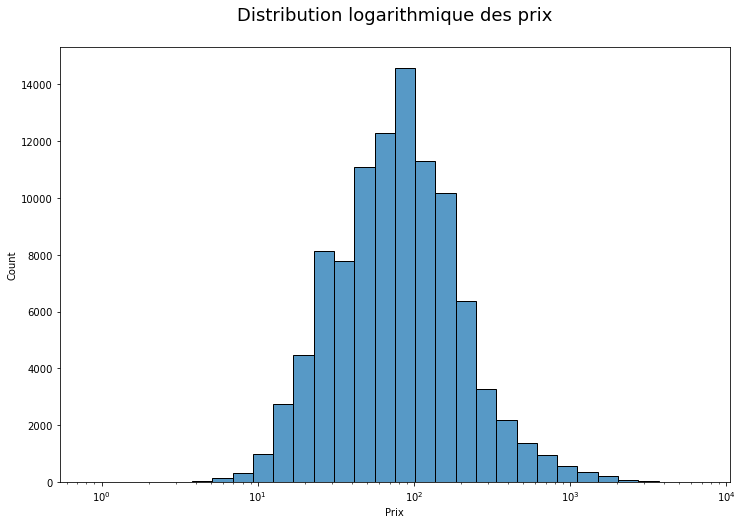

In [72]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df_orders, x='price', log_scale=True, bins=30 )
ax.set_xlabel("Prix")
title = plt.title(f"Distribution logarithmique des prix\n", fontsize=18)

Les prix sont plus ou moins uniforment distribués avec une prédominance des produits à bas prix autour de 60 à 100.

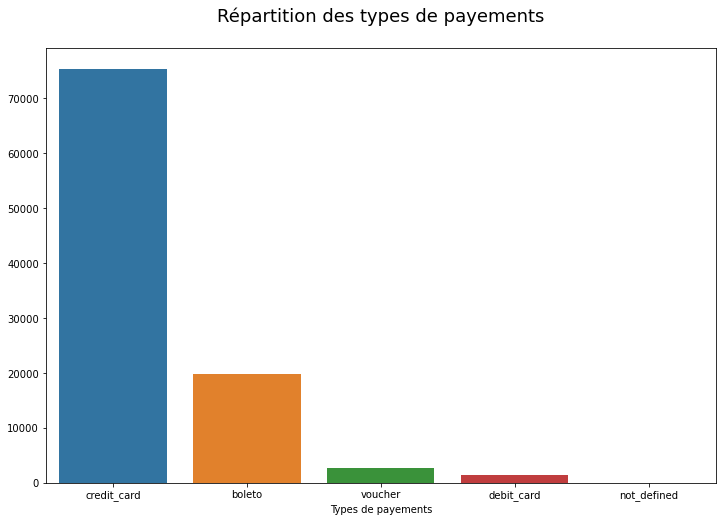

In [73]:
comptage_type_payement = df_orders['payment_type'].value_counts()
plt.figure(figsize=(12,8))
ax = sns.barplot(y=comptage_type_payement.values,x=comptage_type_payement .index)
ax.set_xlabel("Types de payements")
title = plt.title("Répartition des types de payements" "\n", fontsize=18)

La plus part de payements sont effectués par carte de credit.

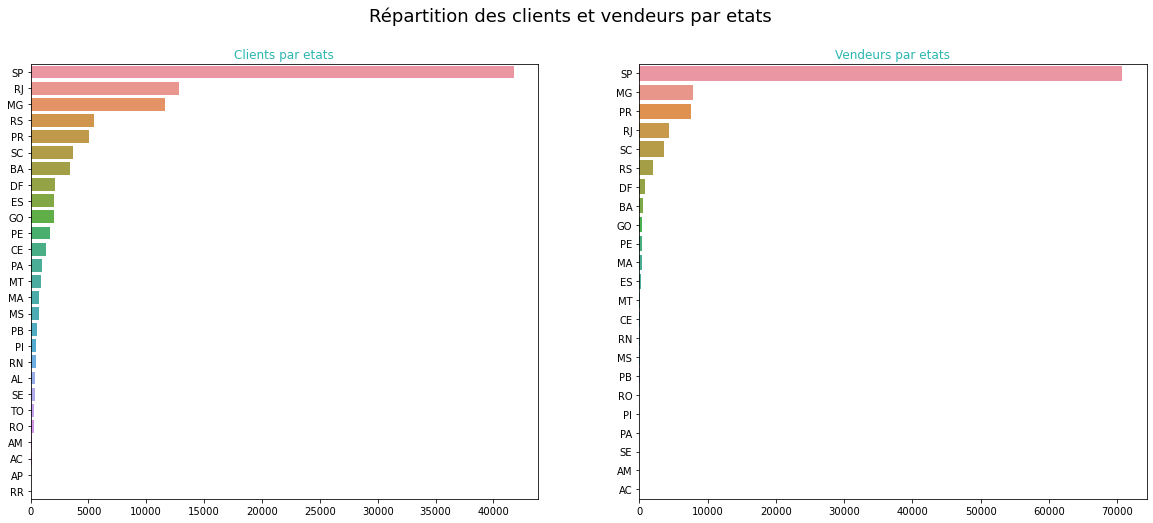

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
comptage_residence_customer = df_orders['customer_state'].value_counts()
ax = sns.barplot(x=comptage_residence_customer.values, y=comptage_residence_customer.index, ax=axes[0])
axes[0].set_title("Clients par etats", color='#2cb7b0' )
comptage_residence_seller = df_orders['seller_state'].value_counts()
ax = sns.barplot(x=comptage_residence_seller.values, y=comptage_residence_seller.index, ax=axes[1])
axes[1].set_title("Vendeurs par etats", color='#2cb7b0' )
title = plt.suptitle("Répartition des clients et vendeurs par etats", fontsize=18)

La majorité des clients comme des vendeurs sont résidents à Sao Paolo.

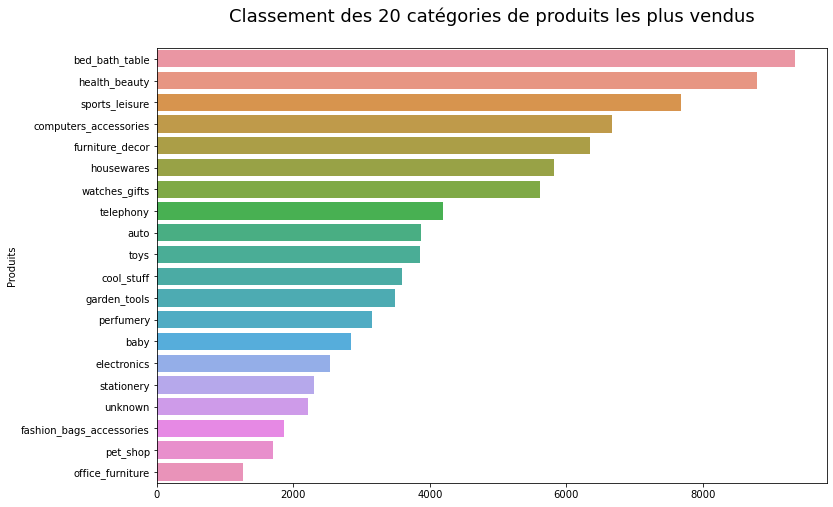

In [75]:
comptage_type_produits = df_orders['product_category_name_english'].value_counts().iloc[:20]
plt.figure(figsize=(12,8))
ax = sns.barplot(x=comptage_type_produits .values, y=comptage_type_produits .index)
ax.set_ylabel("Produits")
title = plt.title("Classement des 20 catégories de produits les plus vendus" "\n", fontsize=18)

Les tables de bain lit, les produits de beauté,de décoration et les accessoires des ordinateurs sont les catégories de produits plus vendus.

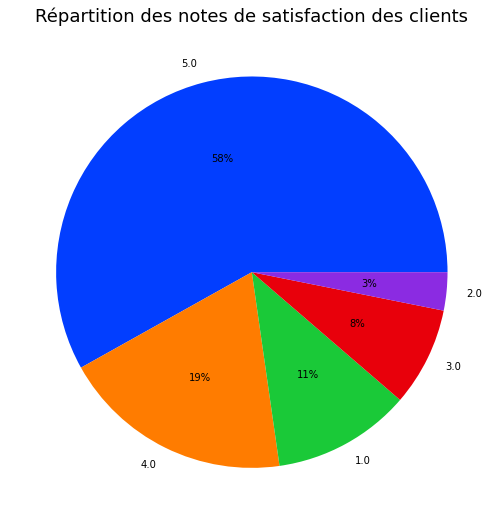

In [76]:
comptage_notes = df_orders['review_score'].value_counts()
colors = sns.color_palette('bright')
plt.figure(figsize=(9, 9))
plt.pie(comptage_notes.values, labels = comptage_notes.index, colors = colors, autopct = '%0.0f%%')
title = plt.title("Répartition des notes de satisfaction des clients" , fontsize=18)

La majorité des clients sont satisfait de leurs produits, avec des proportions de 58% ayant attribués la meilleur note et 11% la pire note de satisfaction.

Nous voulons classer les catégories de produits ayant les meilleurs score de statisfaction de part des client.
Pour cela nous allons calculer un score qui tient compte du nombre de commandes:

In [77]:
data = df_orders.groupby("product_category_name_english").agg({"review_score": "mean",
                                                             "customer_id": "count"})
data['score'] = (data['review_score']+data["customer_id"]) / (data['review_score']*data["customer_id"])
data.sort_values('score', ascending=False).head()

,review_score,customer_id,score
product_category_name_english,,,
security_and_services,2.500000,2,0.900000
fashion_childrens_clothes,4.428571,7,0.368664
unknown,3.184615,2210,0.314462
diapers_and_hygiene,3.740741,27,0.304364
la_cuisine,4.583333,12,0.301515


Affichons le classement des catégories produits ayant les meilleurs scores:

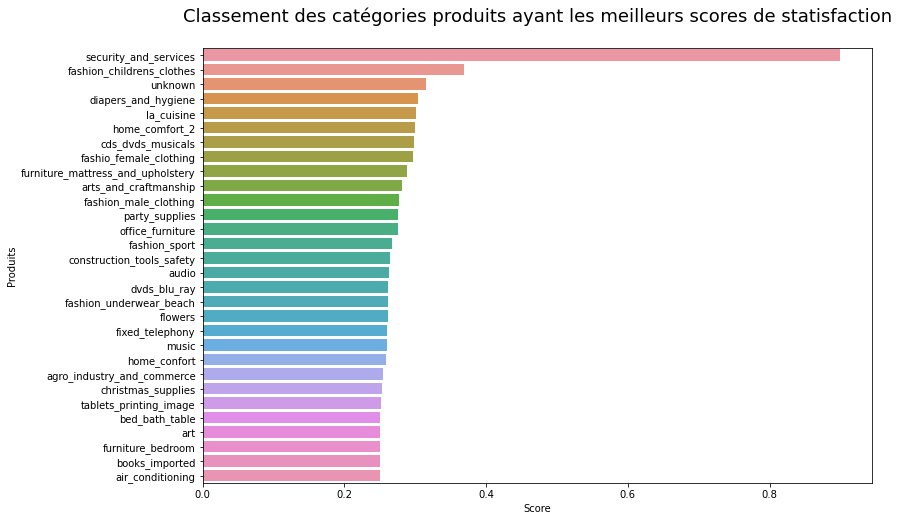

In [78]:
data = data.sort_values('score', ascending=False).iloc[:30]
plt.figure(figsize=(12,8))
ax = sns.barplot(x=data['score'].values, y=data['score'].index)
ax.set_xlabel("Score")
ax.set_ylabel("Produits")
title = plt.title("Classement des catégories produits ayant les meilleurs scores de statisfaction" "\n", fontsize=18)

Les produits des categories security and services sont ceux ayant les meilleurs score pour le dégre de satisfaction des clients, le reste des catégories de produits ont des degrés de satisfaction plus ou moins homogéne.

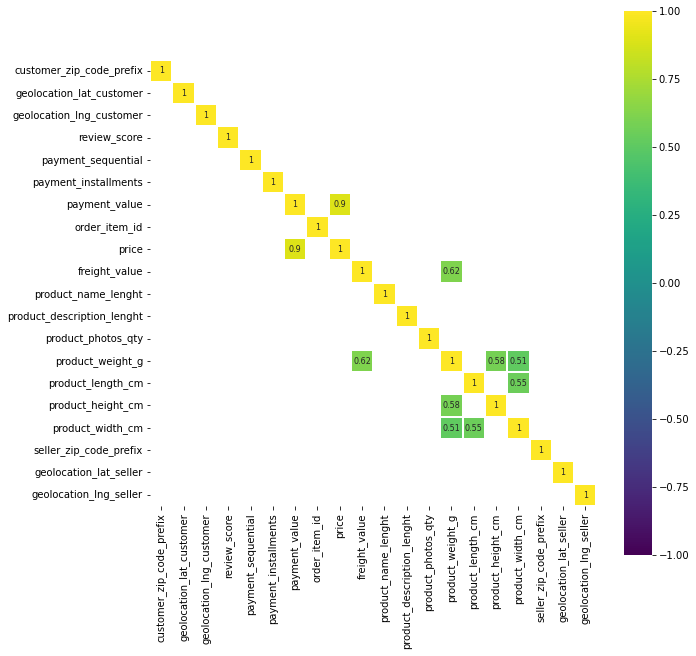

In [79]:
corr = df_orders.select_dtypes(include = ['float64', 'int64']).corr() 
plt.figure(figsize=(10, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [80]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
0,price,payment_value,0.897651


Nous ne rélevons pas de forte correlations entre les variables, à noter tout de même une  correlation entre payment_value et price.

Créons un file csv pour la partie modélisation:

In [81]:
df_orders.to_csv('df_orders.csv', index = False)